<a href="https://colab.research.google.com/github/leonardonels/Colab-python/blob/main/5_Esercizio_in_aula.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [201]:
import numpy as np
import pandas as pd

1. Il file weather.csv contiene informazioni sul meteo di alcune città australiane. Caricare il suo contenuto in un dataframe.

   Quante righe e quante colonne ci sono nel dataset?

   Ci sono valori mancanti?

In [107]:
weather = pd.read_csv('weather.csv',sep=';')
weather.head()

,Month,Location,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,1,Albury,20.4,37.6,0.0,54,0,7,46,17,1013.4,1009.2,3,26.1,36.7,No,No
1,1,Albury,20.9,33.6,0.4,50,9,17,54,30,1011.1,1008.4,8,24.8,31.7,No,Yes
2,1,Albury,18.4,23.1,2.2,48,11,39,62,67,1014.0,1014.8,8,21.8,19.5,Yes,Yes
3,1,Albury,17.3,23.7,15.6,39,9,17,74,65,1017.9,1016.5,8,19.2,21.6,Yes,Yes
4,1,Albury,15.5,22.9,6.8,31,6,9,92,63,1016.3,1013.9,8,17.2,22.2,Yes,No


In [108]:
weather.isnull().sum().sum()

0

In [109]:
weather.isnull().values.any()

False

2. Aggiungere al dataset:

- una nuova colonna "temp_diff" con la differenza in valore assoluto tra i valori di temperatura alle 9 del mattino e le 3 del pomeriggio

- una nuova colonna "hum_diff" con la differenza in valore assoluto tra i valori di umidità alle 9 del mattino e le 3 del pomeriggio

In [110]:
weather['temp_diff']=abs(weather['Temp9am']-weather['Temp3pm'])
weather['hum_diff']=abs(weather['Humidity9am']-weather['Humidity3pm'])
weather

,Month,Location,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,temp_diff,hum_diff
0,1,Albury,20.4,37.6,0.0,54,0,7,46,17,1013.4,1009.2,3,26.1,36.7,No,No,10.6,29
1,1,Albury,20.9,33.6,0.4,50,9,17,54,30,1011.1,1008.4,8,24.8,31.7,No,Yes,6.9,24
2,1,Albury,18.4,23.1,2.2,48,11,39,62,67,1014.0,1014.8,8,21.8,19.5,Yes,Yes,2.3,5
3,1,Albury,17.3,23.7,15.6,39,9,17,74,65,1017.9,1016.5,8,19.2,21.6,Yes,Yes,2.4,9
4,1,Albury,15.5,22.9,6.8,31,6,9,92,63,1016.3,1013.9,8,17.2,22.2,Yes,No,5.0,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14463,12,Uluru,22.1,35.8,63.8,43,17,31,77,41,997.8,995.2,2,26.0,33.5,Yes,No,7.5,36
14464,12,Uluru,22.6,36.8,0.0,50,30,15,63,39,1000.0,998.8,-1,29.7,34.0,No,No,4.3,24
14465,12,Uluru,23.2,38.0,0.0,33,17,17,25,14,1004.4,1001.0,-1,28.7,36.4,No,No,7.7,11
14466,12,Uluru,19.7,37.0,0.0,37,22,6,30,23,1004.6,1000.9,-1,28.2,35.1,No,No,6.9,7


3. Selezionare soltanto le righe in cui "temp_diff" è maggiore di 10 e "hum_diff" è maggiore di 20. Qual è la location in cui si verifica più spesso questa elevata escursione termica (ovvero la location con il maggior numero di righe nella selezione)?

In [111]:
df=weather.groupby((weather['temp_diff']>10) & (weather['hum_diff']>20))

In [112]:
df['Location'].value_counts().head(1).index[0]

(False, 'Darwin')

4. Quante location sono presenti nel file?

In [113]:
weather['Location'].nunique()

42

In [114]:
len(weather['Location'].unique())

42

5. Trasformare i valori della colonna "RainToday" convertendo "yes" in 1 e "no" in 0. Utilizzando il metodo groupby calcolare per ogni location il numero di giorni di pioggia.

In [115]:
class_mapping = {
    'Yes': 1,
    'No': 0,
}
weather['RainToday']=weather['RainToday'].replace(class_mapping)
weather

<ipython-input-115-7da7c5755801>:5: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



,Month,Location,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,temp_diff,hum_diff
0,1,Albury,20.4,37.6,0.0,54,0,7,46,17,1013.4,1009.2,3,26.1,36.7,0,No,10.6,29
1,1,Albury,20.9,33.6,0.4,50,9,17,54,30,1011.1,1008.4,8,24.8,31.7,0,Yes,6.9,24
2,1,Albury,18.4,23.1,2.2,48,11,39,62,67,1014.0,1014.8,8,21.8,19.5,1,Yes,2.3,5
3,1,Albury,17.3,23.7,15.6,39,9,17,74,65,1017.9,1016.5,8,19.2,21.6,1,Yes,2.4,9
4,1,Albury,15.5,22.9,6.8,31,6,9,92,63,1016.3,1013.9,8,17.2,22.2,1,No,5.0,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14463,12,Uluru,22.1,35.8,63.8,43,17,31,77,41,997.8,995.2,2,26.0,33.5,1,No,7.5,36
14464,12,Uluru,22.6,36.8,0.0,50,30,15,63,39,1000.0,998.8,-1,29.7,34.0,0,No,4.3,24
14465,12,Uluru,23.2,38.0,0.0,33,17,17,25,14,1004.4,1001.0,-1,28.7,36.4,0,No,7.7,11
14466,12,Uluru,19.7,37.0,0.0,37,22,6,30,23,1004.6,1000.9,-1,28.2,35.1,0,No,6.9,7


In [116]:
weather.groupby('Location')['RainToday'].sum()

,RainToday
Location,
Adelaide,90
Albury,88
AliceSprings,39
BadgerysCreek,57
Ballarat,110
Bendigo,90
Brisbane,75
Cairns,88
Canberra,81


6. Creare una tabella pivot in cui per ogni location (sulle righe) e per ogni mese (sulle colonne) sia calcolata la temperatura massima media.

In [117]:
weather.pivot_table(index=['Location'], values=['MaxTemp'],columns=['Month'])

MaxTemp                                              \
Month                    1          2          3          4          5    
Location                                                                  
Adelaide          31.190323  29.289655  28.641935  24.826667  19.793548   
Albury            31.487097  32.441379  30.790323  25.810000  18.077419   
AliceSprings      34.858065  37.179310  35.148387  31.824138  25.370000   
BadgerysCreek     28.792857  30.251724  29.412903  26.246667  23.225806   
Ballarat          26.934483  26.288889  24.796667  20.093333  14.925806   
Bendigo           30.100000  30.881481  28.996774  23.186667  17.045161   
Brisbane          30.374074  32.303846  29.929032  28.783333  26.983871   
Cairns            32.116667  33.248276  31.761290  30.431034  28.636842   
Canberra          28.541935  29.306897  27.690323  23.880000  17.326667   
Cobar             34.985714  35.841379  31.558621  28.666667  20.516129   
CoffsHarbour      27.210345  28.457143  27.462069  25.879310  24.340000   
Dartmoor          27.800000  25.582759  24.051613  21.220000  16.632258   
Darwin            32.977419  33.482759  33.748387  34.526667  33.522581   
GoldCoast         29.168421  29.672000  28.855000  27.485714  25.775862   
Hobart            21.946429  23.775862  21.641935  20.426667  15.609677   
Melbourne               NaN        NaN        NaN        NaN  18.593548   
MelbourneAirport  27.174194  26.989655  25.661290  22.686667  18.122581   
Mildura           33.322581  33.806897  31.909677  26.060000  20.356667   
Moree             32.646667  35.803448  33.982609  30.423333  24.145161   
MountGambier      27.429032  25.365517  23.996774  21.336667  16.636000   
Nhil              31.567742  30.140741  28.419355  23.486667  18.193548   
NorahHead         26.848276  27.710345  26.258065  24.430000  22.519355   
NorfolkIsland     25.148276  25.965517  25.564286  24.503333  22.227586   
Nuriootpa         30.374194  29.148276  27.906897  23.376667  18.258621   
PearceRAAF        33.724138  34.250000  31.143333  25.080000  20.751613   
Perth             31.843333  32.231034  29.645161  24.983333  20.841935   
PerthAirport      32.422581  32.750000  29.983871  25.144828  20.809677   
Portland          23.827586  22.182759  21.400000  20.016667  16.438710   
Richmond          28.916129  30.103704  29.317857  26.730000  23.887097   
Sale              23.744000  26.317857  23.986667  21.404762  18.628571   
Sydney            27.726923  28.206897  26.793333  24.603571  22.728571   
SydneyAirport     27.906452  28.375862  26.974194  24.806667  23.296667   
Townsville        32.625806  33.448276  30.651613  31.050000  29.800000   
Tuggeranong       27.686207  29.007407  27.044828  23.350000  17.080000   
Uluru             37.311765  37.925000  35.829032  31.766667  24.993548   
WaggaWagga        31.483871  32.565517  30.577419  26.236667  17.565517   
Walpole           24.188000  24.506897  23.117241  20.496429  18.093103   
Watsonia          28.303704  27.627586  26.200000  22.806667  18.441935   
Williamtown       28.465517  29.068966  28.662963  25.470370  22.819355   
Witchcliffe       28.654167  26.689655  25.720690  21.917857  18.693333   
Wollongong        25.306452  25.650000  24.209677  23.100000  21.619355   
Woomera           35.325806  34.862069  31.767742  27.893103  22.141935   

                                                                         \
Month                    6          7          8          9          10   
Location                                                                  
Adelaide          16.043333  15.283871  17.658065  17.420000  20.993548   
Albury            13.423333  13.280645  15.248387  16.823333  19.667742   
AliceSprings      20.690000  21.080000  22.638710  24.620000  30.516667   
BadgerysCreek     18.106667  18.483871  18.716129  21.093103  24.477419   
Ballarat          10.551724  10.151613  11.803226  13.190000  15.556667   
Bendigo           12.746667  12.812903  14.2

7. Visualizzare in un unico grafico la distribuzione dei valori di temperatura massima nel mese di maggio (5) e dicembre (12).

In [202]:
%matplotlib inline
import matplotlib.pyplot as plt

In [181]:
may=weather.pivot_table(index=['Location'], values=['MaxTemp'],columns=['Month']).iloc[:,4]
dec=weather.pivot_table(index=['Location'], values=['MaxTemp'],columns=['Month']).iloc[:,11]

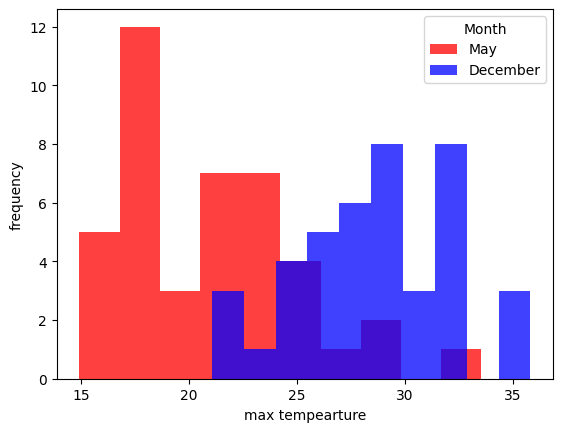

In [197]:
fig, axes = plt.subplots()
axes.hist(may, color='r', label='May', alpha=0.75)
axes.hist(dec, color='b', label='December', alpha=0.75)
plt.ylabel("frequency")
plt.xlabel("max tempearture")
plt.legend(title='Month')

fig.show(False)

8. Visualizzare in uno scatterplot la relazione tra i valori di pressione e i valori di umidità (fare 2 plot distinti nella stessa figura, uno per i valori 9am e un altro per i valori 3pm). Colorare i punti di due colori diversi in base ai valori di RainToday.

In [257]:
df=pd.DataFrame()
df=weather
df

,Month,Location,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,temp_diff,hum_diff
0,1,Albury,20.4,37.6,0.0,54,0,7,46,17,1013.4,1009.2,3,26.1,36.7,0,No,10.6,29
1,1,Albury,20.9,33.6,0.4,50,9,17,54,30,1011.1,1008.4,8,24.8,31.7,0,Yes,6.9,24
2,1,Albury,18.4,23.1,2.2,48,11,39,62,67,1014.0,1014.8,8,21.8,19.5,1,Yes,2.3,5
3,1,Albury,17.3,23.7,15.6,39,9,17,74,65,1017.9,1016.5,8,19.2,21.6,1,Yes,2.4,9
4,1,Albury,15.5,22.9,6.8,31,6,9,92,63,1016.3,1013.9,8,17.2,22.2,1,No,5.0,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14463,12,Uluru,22.1,35.8,63.8,43,17,31,77,41,997.8,995.2,2,26.0,33.5,1,No,7.5,36
14464,12,Uluru,22.6,36.8,0.0,50,30,15,63,39,1000.0,998.8,-1,29.7,34.0,0,No,4.3,24
14465,12,Uluru,23.2,38.0,0.0,33,17,17,25,14,1004.4,1001.0,-1,28.7,36.4,0,No,7.7,11
14466,12,Uluru,19.7,37.0,0.0,37,22,6,30,23,1004.6,1000.9,-1,28.2,35.1,0,No,6.9,7


In [262]:
mean_p=df['Pressure3pm'].mean()
std_p=df['Pressure3pm'].std()
out=3

new_df = df[(df['Pressure3pm'] > (mean_p - out * std_p)) & (df['Pressure3pm'] < (mean_p + out * std_p))]

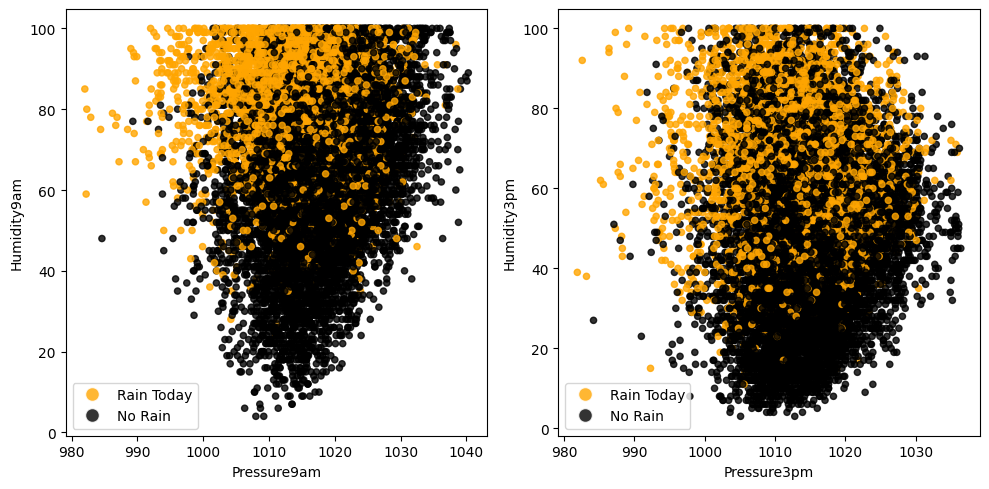

In [266]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
colors = new_df['RainToday'].map({1: 'orange', 0: 'black'})
alpha_value = 0.8

new_df.plot.scatter(x='Pressure9am', y='Humidity9am', ax=ax1, c=colors, alpha=alpha_value)
new_df.plot.scatter(x='Pressure3pm', y='Humidity3pm', ax=ax2, c=colors, alpha=alpha_value)

from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Rain Today',
                          markerfacecolor='orange', markersize=10, alpha=alpha_value),
                   Line2D([0], [0], marker='o', color='w', label='No Rain',
                          markerfacecolor='black', markersize=10, alpha=alpha_value)]

ax1.legend(handles=legend_elements, loc='lower left')
ax2.legend(handles=legend_elements, loc='lower left')

plt.tight_layout()
fig.show()